In [1]:
from Networks.MLP_Dict import MLP_Dict
from Trainers import split_data,Trainer
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import joblib
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import jet

In [2]:
# 初始化模型
input_shape = (2,)  # 输入形状
output_shape = (16384, )

model = MLP_Dict(input_shape, output_shape, hidden_layers=[16, 32, 64, 128], activation_function="tanh", output_keys=["u"])

# 加载训练好的权重
model.load_state_dict(torch.load("model/MLP001.pth", weights_only=True))

# 将模型设置为评估模式
model.eval()

MLP_Dict(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): Tanh()
    (8): Linear(in_features=128, out_features=16384, bias=True)
  )
)

In [5]:
# value set
input_test = np.array([3, 3])

input_test_np = input_test.astype(np.float32)

input_test_torch = torch.from_numpy(input_test_np)

# 将数据移动到 GPU（如果可用）
device = "cpu"
model = model.to(device)
input_test_torch = input_test_torch.to(device)

In [6]:
# 进行预测
with torch.no_grad():
    u_pred = model(input_test_torch)

u_pred['u'].shape
u_pred = u_pred['u'].numpy().reshape((32, 32, 16))


In [8]:
x_inter = np.linspace(0, 0.04, 32)
y_inter = np.linspace(0, 0.04, 32)
z_inter = np.linspace(0, 0.3, 16)

X, Y, Z = np.meshgrid(x_inter, y_inter, z_inter)

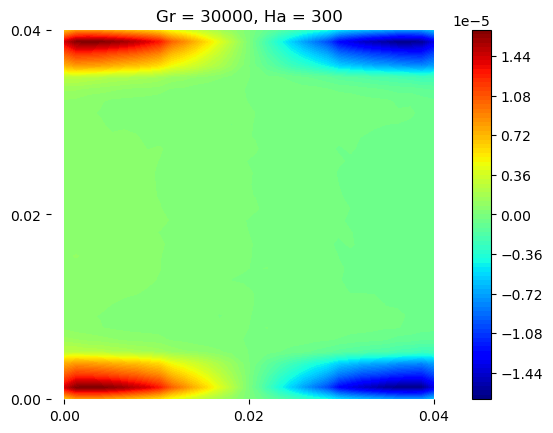

In [9]:
cut = 8
c=plt.contourf(X[:,:,cut], Y[:,:,cut],u_pred[:,:,cut] / 1e5,cmap='jet',levels=100)
plt.colorbar(c)
plt.axis('equal')
plt.title('Gr = 30000, Ha = 300')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([0, 0.02, 0.04])
ax.set_yticks([0, 0.02, 0.04])
# plt.savefig('result/Gr4e4,Ha4e2_PIRN.png')